In [ ]:
Data Wrangling with R

In [5]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
#Download MS_trafficstops_bw_age.csv:
download.file("http://bit.ly/MS_trafficstops_bw_age","data/MS_trafficstops_bw_age.csv")

In [3]:
#Download MS_acs2015_bw.csv:
download.file("http://bit.ly/MS_acs_2015_bw","data/MS_acs2015_bw.csv")

1.2 Subsetting columns and rows

Let’s begin with loading our sample data into a data frame.

We will be working a small subset of the data from the Stanford Open Policing Project. It contains information about traffic stops for blacks and whites in the state of Mississippi during January 2013 to mid-July of 2016.

In [7]:
stops <- read_csv("data/MS_trafficstops_bw_age.csv")

Rows: 211211 Columns: 11
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (7): id, county_name, police_department, driver_gender, driver_race, of...
dbl  (2): county_fips, driver_age
date (2): stop_date, driver_birthdate

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
You may have noticed that by using read_csv we have generated an object of class tbl_df, also known as a “tibble.” Tibble’s data structure is very similar to a data frame. For our purposes the only differences are that

        columns of class character are never converted into factors1,
        it tries to recognize and date types
        the output displays the data type of each column under its name, and
        it only prints the first few rows of data and only as many columns as fit on one screen. If we wanted to print all columns we can use the print command, and set the width parameter to Inf. To print the first 6 rows for example we would do this: print(my_tibble, n=6, width=Inf).


To select columns of a data frame with dplyr, use select(). The first argument to this function is the data frame (stops), and the subsequent arguments are the columns to keep.

In [6]:
select(stops, police_department, officer_id, driver_race)

ERROR: Error in select(stops, police_department, officer_id, driver_race): object 'stops' not found


In [ ]:
It is worth knowing that dplyr is backed by another package with a number of helper functions, which provide convenient functions to select columns based on their names. For example:

In [8]:
select(stops, starts_with("driver"))

driver_gender,driver_birthdate,driver_race,driver_age
<chr>,<date>,<chr>,<dbl>
male,1950-06-14,Black,63
male,1967-04-06,Black,46
male,1974-04-15,Black,39
male,1981-03-23,White,32
male,1992-08-03,White,20
female,1960-05-02,White,53
female,1953-03-16,White,60
female,1993-06-14,White,20
male,1947-12-11,White,65


In [ ]:
To subset rows based on specific criteria, we use filter():

In [9]:
filter(stops, county_name == "Yazoo")

id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>
MS-2013-00252,2013-01-02,Yazoo,28163,Mississippi Highway Patrol,male,1950-05-04,Black,C037,63,Speeding
MS-2013-00253,2013-01-02,Yazoo,28163,Mississippi Highway Patrol,female,1967-05-29,Black,C011,46,Speeding
MS-2013-00254,2013-01-02,Yazoo,28163,Mississippi Highway Patrol,male,1986-12-21,Black,C011,26,Speeding
MS-2013-00331,2013-01-02,Yazoo,28163,Mississippi Highway Patrol,female,1986-02-01,Black,C037,27,Speeding
MS-2013-00350,2013-01-02,Yazoo,28163,Mississippi Highway Patrol,male,1994-11-21,White,C037,18,Speeding
MS-2013-00426,2013-01-03,Yazoo,28163,Mississippi Highway Patrol,male,1994-02-24,White,C014,19,Speeding
MS-2013-00427,2013-01-03,Yazoo,28163,Mississippi Highway Patrol,male,1953-07-24,White,C063,59,Speeding
MS-2013-00631,2013-01-04,Yazoo,28163,Mississippi Highway Patrol,male,1959-10-05,White,C014,53,Speeding
MS-2013-00841,2013-01-04,Yazoo,28163,Mississippi Highway Patrol,male,1989-06-01,Black,C014,24,Speeding


In [ ]:
Here are some other ways to subset rows:

    by row number: slice(stops, 1:3) # rows 1-3
    rows with highest or lowest values of a variable:
        slice_min(stops, driver_age) # likewise slice_max()
    random rows:
        slice_sample(stops, n = 5) # number of rows to select
        slice_sample(stops, prop = .0001) # fraction of rows to select


In [10]:
#To sort rows by variables use the arrange function:

arrange(stops, county_name, stop_date)

id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation
<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>
MS-2013-07659,2013-02-09,Adams,28001,Mississippi Highway Patrol,male,1989-06-12,Black,M004,24,Speeding
MS-2013-11819,2013-03-02,Adams,28001,Mississippi Highway Patrol,female,1974-10-16,Black,M042,38,License-Permit-Insurance
MS-2013-14647,2013-03-16,Adams,28001,Mississippi Highway Patrol,female,1977-07-15,Black,M049,36,Speeding
MS-2013-15430,2013-03-20,Adams,28001,Mississippi Highway Patrol,female,1991-06-15,Black,M049,22,License-Permit-Insurance
MS-2013-18581,2013-04-06,Adams,28001,Mississippi Highway Patrol,female,1980-04-18,White,M010,33,License-Permit-Insurance
MS-2013-20016,2013-04-13,Adams,28001,Mississippi Highway Patrol,female,1996-01-14,Black,M024,17,Speeding
MS-2013-21072,2013-04-19,Adams,28001,Mississippi Highway Patrol,female,1981-04-23,Black,M049,32,License-Permit-Insurance
MS-2013-21733,2013-04-21,Adams,28001,Mississippi Highway Patrol,female,1974-09-09,Black,M049,39,Speeding
MS-2013-22172,2013-04-24,Adams,28001,Mississippi Highway Patrol,male,1995-05-15,White,M046,18,Speeding


1.3 Pipes

What if you wanted to filter and select on the same data? For example, lets find drivers over 85 years and only keep the violation and gender columns. There are three ways to do this: use intermediate steps, nested functions, or pipes.

Intermediate steps:
With intermediate steps, you essentially create a temporary data frame and use that as input to the next function. This can clutter up your workspace with lots of objects.

In [11]:
tmp_df <- filter(stops, driver_age > 85)
select(tmp_df, violation, driver_gender)

violation,driver_gender
<chr>,<chr>
Seat belt,male
Speeding,male
Seat belt,male


Nested functions
You can also nest functions (i.e. placce one function inside of another). This is handy, but can be difficult to read if too many functions are nested as things are evaluated from the inside out.



In [12]:
select(filter(stops, driver_age > 85), violation, driver_gender)

violation,driver_gender
<chr>,<chr>
Seat belt,male
Speeding,male
Seat belt,male


Pipes!

The last option, called “pipes.” Pipes let you take the output of one function and send it directly to the next, which is useful when you need to do many things to the same dataset. Pipes in R look like %>% and are made available via the magrittr package, which is installed automatically with dplyr. If you use RStudio, you can type the pipe with Ctrl + Shift + M if you have a PC or Cmd + Shift + M if you have a Mac.

In [13]:
stops %>%
  filter(driver_age > 85) %>%
  select(violation, driver_gender)

violation,driver_gender
<chr>,<chr>
Seat belt,male
Speeding,male
Seat belt,male


If we wanted to create a new object with this smaller version of the data, we could do so by assigning it a new name:


In [14]:
senior_drivers <- stops %>%filter(driver_age > 85) %>%select(violation, driver_gender, driver_race)

senior_drivers

violation,driver_gender,driver_race
<chr>,<chr>,<chr>
Seat belt,male,White
Speeding,male,White
Seat belt,male,Black


Challenge
    Using pipes, subset the stops data to include stops in Tunica county only and retain the columns stop_date, driver_age, and violation. Bonus: sort the table by driver age.


In [ ]:
1.4 Add new columns

Frequently you’ll want to create new columns based on the values in existing columns or. For this we’ll use mutate(). We can also reassign values to an existing column with that function.

Be aware that new and edited columns will not permanently be added to the existing data frame – unless we explicitly save the output.

So here is an example using the year() function from the lubridate package to extract the year of the drivers’ birthdate:

In [15]:
library(lubridate)

stops %>% 
  mutate(birth_year = year(driver_birthdate))


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation,birth_year
<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>
MS-2013-00001,2013-01-01,Jones,28067,Mississippi Highway Patrol,male,1950-06-14,Black,J042,63,Seat belt,1950
MS-2013-00002,2013-01-01,Lauderdale,28075,Mississippi Highway Patrol,male,1967-04-06,Black,B026,46,Careless driving,1967
MS-2013-00003,2013-01-01,Pike,28113,Mississippi Highway Patrol,male,1974-04-15,Black,M009,39,Speeding,1974
MS-2013-00004,2013-01-01,Hancock,28045,Mississippi Highway Patrol,male,1981-03-23,White,K035,32,Speeding,1981
MS-2013-00005,2013-01-01,Holmes,28051,Mississippi Highway Patrol,male,1992-08-03,White,D028,20,Speeding,1992
MS-2013-00006,2013-01-01,Jackson,28059,Mississippi Highway Patrol,female,1960-05-02,White,K023,53,Speeding,1960
MS-2013-00007,2013-01-01,Jackson,28059,Mississippi Highway Patrol,female,1953-03-16,White,K032,60,Speeding,1953
MS-2013-00008,2013-01-01,Grenada,28043,Mississippi Highway Patrol,female,1993-06-14,White,D021,20,Speeding,1993
MS-2013-00009,2013-01-01,Holmes,28051,Mississippi Highway Patrol,male,1947-12-11,White,R021,65,Speeding,1947


In [16]:
#We can keep adding columns like this:

stops %>% 
  mutate(birth_year = year(driver_birthdate),
         birth_cohort = floor(birth_year/10)*10)

id,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,officer_id,driver_age,violation,birth_year,birth_cohort
<chr>,<date>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
MS-2013-00001,2013-01-01,Jones,28067,Mississippi Highway Patrol,male,1950-06-14,Black,J042,63,Seat belt,1950,1950
MS-2013-00002,2013-01-01,Lauderdale,28075,Mississippi Highway Patrol,male,1967-04-06,Black,B026,46,Careless driving,1967,1960
MS-2013-00003,2013-01-01,Pike,28113,Mississippi Highway Patrol,male,1974-04-15,Black,M009,39,Speeding,1974,1970
MS-2013-00004,2013-01-01,Hancock,28045,Mississippi Highway Patrol,male,1981-03-23,White,K035,32,Speeding,1981,1980
MS-2013-00005,2013-01-01,Holmes,28051,Mississippi Highway Patrol,male,1992-08-03,White,D028,20,Speeding,1992,1990
MS-2013-00006,2013-01-01,Jackson,28059,Mississippi Highway Patrol,female,1960-05-02,White,K023,53,Speeding,1960,1960
MS-2013-00007,2013-01-01,Jackson,28059,Mississippi Highway Patrol,female,1953-03-16,White,K032,60,Speeding,1953,1950
MS-2013-00008,2013-01-01,Grenada,28043,Mississippi Highway Patrol,female,1993-06-14,White,D021,20,Speeding,1993,1990
MS-2013-00009,2013-01-01,Holmes,28051,Mississippi Highway Patrol,male,1947-12-11,White,R021,65,Speeding,1947,1940


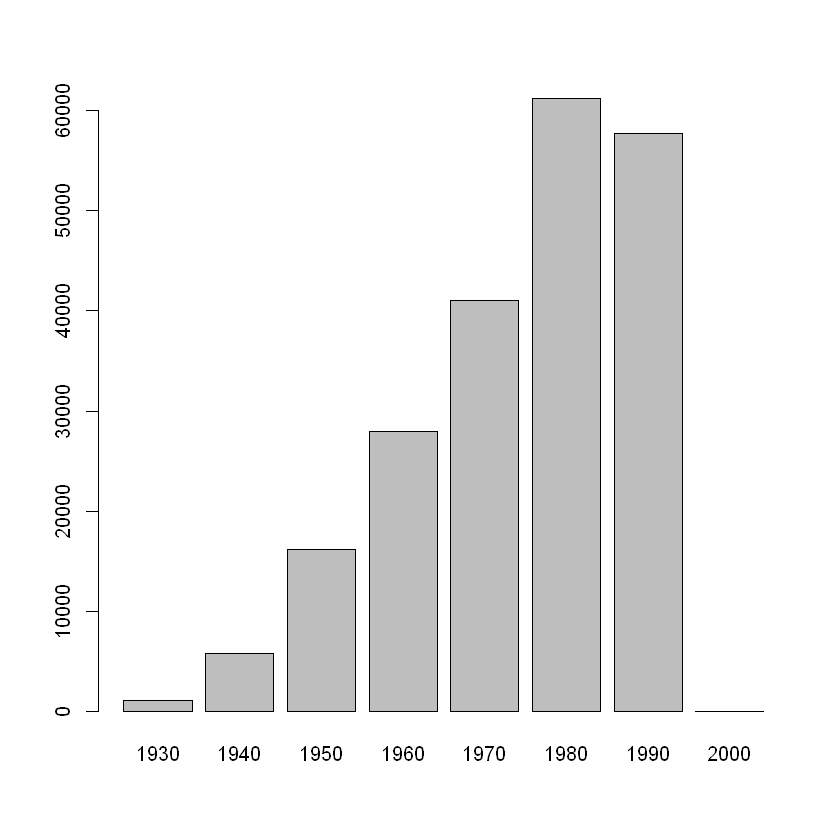

In [17]:
#We are beginning to see the power of piping. 
#Here is a slightly expanded example, where we select the column birth_cohort that we have created and send it to plot:

stops %>% 
  mutate(birth_year = year(driver_birthdate),
         birth_cohort = floor(birth_year/10)*10,
         birth_cohort = factor(birth_cohort)) %>%
    select(birth_cohort) %>% 
    plot()

Mutate can also be used in conjunction with logical conditions. 
For example, we could create a new column, where we assign everyone born after the year 2000 to a group “millenial” and overyone before to “pre-millenial.”

In order to do this we take advantage of the ifelse function:
ifelse(a_logical_condition, if_true_return_this, if_false_return_this)

In [18]:
#In conjunction with mutate, this works like this:

stops %>% 
  mutate(cohort = ifelse(year(driver_birthdate) < 2000, "pre-millenial", "millenial")) %>% 
  select(driver_birthdate, cohort)

driver_birthdate,cohort
<date>,<chr>
1950-06-14,pre-millenial
1967-04-06,pre-millenial
1974-04-15,pre-millenial
1981-03-23,pre-millenial
1992-08-03,pre-millenial
1960-05-02,pre-millenial
1953-03-16,pre-millenial
1993-06-14,pre-millenial
1947-12-11,pre-millenial


Challenge
Create a new data frame from the stops data that meets the following criteria: contains only the violation column for female drivers of age 50 that were stopped on a Sunday. For this add a new column to your data frame called weekday_of_stop containing the number of the weekday when the stop occurred. Use the wday() function from lubridate (Sunday = 1).

Think about how the commands should be ordered to produce this data frame!


In [ ]:
1.5 What is split-apply-combine?

1.5 What is split-apply-combine?

Many data analysis tasks can be approached using the split-apply-combine paradigm: split the data into groups, apply some analysis to each group, and then combine the results.

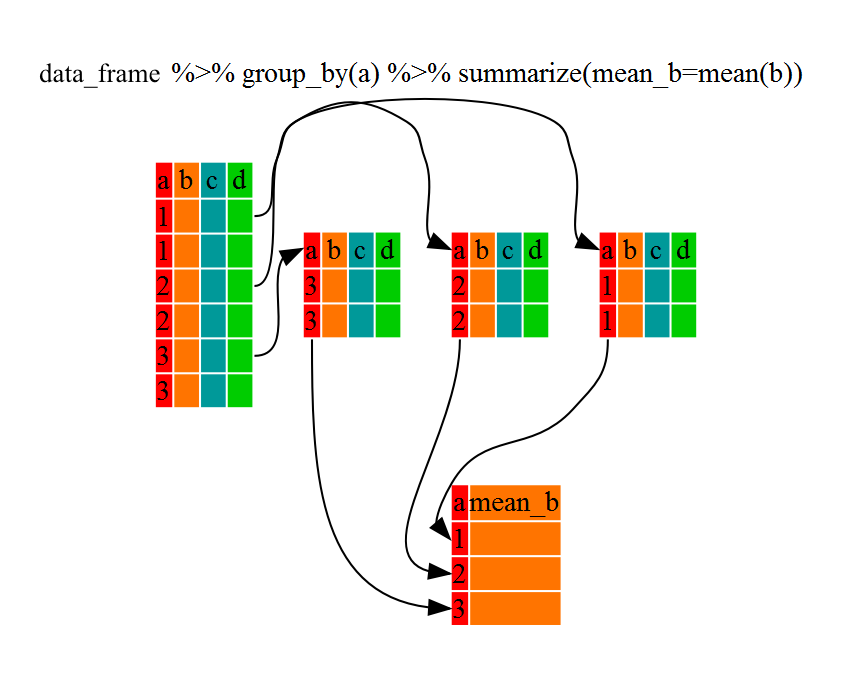

dplyr makes this possible through the use of the group_by() function.

group_by() is often used together with summarize(), which collapses each group into a single-row summary of that group. group_by() takes as arguments the column names that contain the categorical variables for which you want to calculate the summary statistics. So to view the mean age for black and white drivers:

In [ ]:
stops %>%
  group_by(driver_race) %>%
  summarize(mean_age = mean(driver_age, na.rm=TRUE))

In [ ]:
#> `summarise()` ungrouping output (override with `.groups` argument)

In [ ]:
#If we wanted to remove the line with NA we could insert a filter() in the chain:

stops %>%
  filter(!is.na(driver_race)) %>% 
  group_by(driver_race) %>%
  summarize(mean_age = mean(driver_age, na.rm=TRUE))

In [ ]:
#> `summarise()` ungrouping output (override with `.groups` argument)

In [ ]:
Recall that is.na() is a function that determines whether something is an NA. The ! symbol negates the result, so we’re asking for everything that is not an NA.

You can also group by multiple columns:

In [ ]:
stops %>% 
  filter(!is.na(driver_race)) %>%
  group_by(county_name, driver_race) %>%
  summarize(mean_age = mean(driver_age, na.rm=TRUE))

In [ ]:
#> `summarise()` regrouping output by 'county_name' (override with `.groups` argument)

Once the data are grouped, you can also summarize multiple variables at the same time (and not necessarily on the same variable). For instance, we could add a column indicating the minimum age in each group (i.e. county):

In [ ]:
stops %>%
  filter(!is.na(driver_race)) %>% 
  group_by(county_name, driver_race) %>%
  summarize(mean_age = mean(driver_age, na.rm=TRUE),
            min_age = min(driver_age, na.rm=TRUE))

#> `summarise()` regrouping output by 'county_name' (override with `.groups` argument)